## 1. Importing Libraries

In [47]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import csv

from get_credentials import get_credentials
from create_lib import create_lib
from get_uniques import get_uniques
from df_d import df_duplicates
from df_nd import df_no_duplicates
from artistsgenres_dummies import artistsgenres_dummies

from sklearn import preprocessing

## 2. Import Data

In [48]:
cid,secret = get_credentials()

# Passing the credentials through the Spotify API (Authentication - without user)
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [49]:
# Adding the Playlist link and URI.
# 4000 songs
# playlist_link = "https://open.spotify.com/playlist/5F5yHyXHt6vp2taA7DrEhJ?si=b4f82e9651444f28"
# 500 songs
playlist_link = "https://open.spotify.com/playlist/5CYdyJ0w4OVc1oitZWQvj3?si=76db4826bb254432"
# 16 songs
# playlist_link = "https://open.spotify.com/playlist/7LaicnuGlBjUoHZ5Rd4tjm?si=e9f47ebd992b4d08"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

# Spotify API only allows you to take 100 songs at a time.
# This allows you to continue to take 100 songs as many times as you can from the given playlist.
results = sp.playlist_tracks(playlist_URI)
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

In [50]:
# for track in tracks:
#     print(track["track"]["name"])
#     print(sp.artist(track["track"]["artists"][0]["id"])["genres"], '\n')
#     pass
# print(sp.audio_analysis(track["track"]["id"]), '\n')
# print(sp.audio_features(track["track"]["uri"]), '\n')
# print(sp.track(track["track"]["uri"]), '\n')
# print(track["track"]["artists"][0]["id"], '\n')
# print(sp.artist(track["track"]["artists"][0]["id"])["genres"], '\n')

In [51]:
# Create dictionary of songs and uplicate index for identifying duplicate and unique songs.
lib, duplicate_index = create_lib(sp, tracks)
# Get the unique songs (-1) and index associated with duplicate songs
uniques, num_uniques = get_uniques(duplicate_index)
# Remove duplicate songs
lib = df_no_duplicates(lib)
df = pd.DataFrame.from_dict(lib, orient='index')
df = df.drop(['local','song_fil','artists_fil','album_fil'], 1)
df.to_csv('Playlist.csv', encoding='utf-8', index = False)
# df.head()

Backseat Freestyle
Lord Pretty Flacko Jodye 2 (LPFJ2)
Jump (feat. Gizzle)
0 To 100 / The Catch Up
m.A.A.d city
Jumpman
Stupid AP
Back To Back
Work REMIX (feat. A$AP Rocky, French Montana, Trinidad James & ScHoolboy Q)
Hot N*gga
Panda
Big Rings
One Step Closer
Hit the Floor
B Boy (feat. Big Sean & A$AP Ferg)
...To Be Loved
Secrets - Radio Edit
Runaway (U & I)
OOOUUU
Shabba (feat. A$AP Rocky)
Devil in a Midnight Mass
You Don't Own Me (feat. G-Eazy) - Candyland Remix
East Coast REMIX (feat. Busta Rhymes, A$AP Rocky, Dave East, French Montana, Rick Ross & Snoop Dogg)
MIC Drop (feat. Desiigner) [Steve Aoki Remix]
Ric Flair Drip (with Metro Boomin)
King's Dead (with Kendrick Lamar, Future & James Blake)
Power
In For The Kill - Skrillex Remix
No Limit
Outside (feat. Ellie Goulding)
DNA.
6 Foot 7 Foot
HUMBLE.
East Coast (feat. Remy Ma)
F**kin' Problems (feat. Drake, 2 Chainz & Kendrick Lamar)
Wild for the Night (feat. Skrillex & Birdy Nam Nam)
Miss Murder
Not Above Love
Blow Exxplode
Killing Y

Expected id of type track but found type Could%27ve+Had+It+All+%28Prod.+By+Luminox%29 spotify:local:Quinn:Shlup:Could%27ve+Had+It+All+%28Prod.+By+Luminox%29:203


Your Betrayal
Could've Had It All (Prod. By Luminox)
Hand Of Blood
Heartbeat
No Way Out (feat. Kat Nestel) - Radio Edit
Nothing On My Back


Expected id of type track but found type Sober+%282Scratch+Remix%29 spotify:local:G-Eazy+ft.+Charlie+Puth:Sober+%28Feat.+Charlie+Puth%29+2Sc:Sober+%282Scratch+Remix%29:258


Run With Me
Sober (2Scratch Remix)
Get Low
Silence - Slushii Remix
It's You - Radio Edit
Bruises
Solita (feat. Rich The Kid)
Hey Baby (Drop It to the Floor) (feat. T-Pain)
Backin' It Up (feat. Cardi B)
Wrist
Take It Back
Tick, Tock
Homicide (feat. Eminem)
Under Pressure
Wannabe
Wu Tang Forever (ft. Ghostface Killah, Raekwon, RZA, Method Man, Inspectah Deck, Cappadonna, Jackpot Scotty Wotty, U-God, Masta Killa, GZA)
Mama/Show Love (feat. YBN Cordae)
Tough Love
Go Loko
Faint
Nobody
french toast
Love No More
Electric Body (feat. ScHoolboy Q)
Better When You're Gone
Nobody Like You
YUCK
REDLIGHT
Hold Me Back
Savage Mode
Coming In Hot
Off Deez (with J. Cole)
Heaven Can Wait - The Aston Shuffle Remix
Chico (feat. Wiz Khalifa & Kap G)
Whole Place Locked
WARLORDZ (feat. Skrillex)
Fake Chanel
Mercy.1 - Album Version (Edited)
Clique - Album Version (Edited)
Go Loko (feat. Tyga, Jon Z)
U Mad
Slick Talk
You Know What It Is
WINDOWS FT. RICK RO$$
Tap (feat. Meek Mill)
Emergency
IM GONE
Undefeated (f

Expected id of type track but found type Eminem+-+Superman+%28Duane+Bartolo+Bootleg%29 spotify:local:::Eminem+-+Superman+%28Duane+Bartolo+Bootleg%29:423


Eminem - Superman (Duane Bartolo Bootleg)
Touchdown
Touchdown (feat. Busta Rhymes & French Montana) - Remix
Fire It Up
Out The Speakers


Expected id of type track but found type Rock+Yo+Head spotify:local:Tech+N9ne::Rock+Yo+Head:20
Expected id of type track but found type Sparks+%28Vicetone+Remix%29 spotify:local:Fedde+le+Grand+%26+Nicky+Romero+ft.+Matthew+Koma+-+Sparks+%28Vicetone+Remix%29:Vicetone:Sparks+%28Vicetone+Remix%29:367


Rock Yo Head
Sparks (Vicetone Remix)
Runnin' (Dying To Live)


Expected id of type track but found type Puff+Daddy+-+Come+With+Me spotify:local:::Puff+Daddy+-+Come+With+Me:365


Twist
Puff Daddy - Come With Me
Hardbeat Market - The Original Soundmachine
The MF Point Of Perfection - Original Dubstlyle Mix
The Beast
Call Me A Spaceman - Radio Edit
Faget
I Need You To Know
Perfect
lil bit
Who's Laughing Now
More - RedOne Jimmy Joker Remix
Animal
Daisies - Oliver Heldens Remix
I WANNA SEE SOME ASS (feat. jetsonmade)
Hey Sexy Lady - Skrillex Remix
Expensive (feat. Nicki Minaj)
Shake That (Remix)
WAP (feat. Megan Thee Stallion)
I Need You to Know (feat. Ifimay) - Extended Mix
Blow Me Away
All Night
Black Horse And The Cherry Tree
Touch It
2 Seater (feat. G-Eazy & Offset)
Little Poor Me
REDLIGHT
Loudest MF
Boing Boing (feat. The Seige)
YES! (feat. Rich The Kid & K CAMP)
Not Sorry (feat. Nicki Minaj)
Jimmy Crack Corn
Wrong Side of Love (with Darius Rucker)
Astronomia - Never Go Home
Tarantino (feat. STARX)
Reptile's Theme
Butterflies - Mazare Remix
Ghosts 'n' Stuff (feat. Rob Swire) - Radio Edit
Dumb Sh!t (with Jasiah)
Told Ya
IDFC (feat. Ravenna Golden)
Vision (feat.

Expected id of type track but found type Accelerate spotify:local:Nightcore::Accelerate:175
Expected id of type track but found type The+Champ+ft.Tay+Dizm spotify:local:T+Pain::The+Champ+ft.Tay+Dizm:237


Headsprung
Accelerate
The Champ ft.Tay Dizm
Leave The Lights On (Krot Remix)

Expected id of type track but found type Leave+The+Lights+On+%28Krot+Remix%29 spotify:local:Meiko::Leave+The+Lights+On+%28Krot+Remix%29:405
Expected id of type track but found type Hello+2.0 spotify:local:D%21rty+Palm:D%21rty+Palm:Hello+2.0:255
Expected id of type track but found type Mi+Mi+Mi spotify:local:Nightcore::Mi+Mi+Mi:166
Expected id of type track but found type Run spotify:local:Nightcore::Run:200



Hello 2.0
Mi Mi Mi
Run


Expected id of type track but found type Rushing+Back+%28Ekko+%26+Sidetrack+Bootleg%29 spotify:local:Flume::Rushing+Back+%28Ekko+%26+Sidetrack+Bootleg%29:272
Expected id of type track but found type Windows+Down spotify:local:Nightcore::Windows+Down:157


Rushing Back (Ekko & Sidetrack Bootleg)
Windows Down
Nice & Easy (feat. Rodney P)
BIG BOY TIME
Eparrei


Expected id of type track but found type Ballin+%28ft.+Castro%29 spotify:local:Logic::Ballin+%28ft.+Castro%29:229


Magic Trick
Ballin (ft. Castro)
Somebody Like You
Die Young - Original Mix
Satisfaction (Dada Life Remix) - Benny Benassi Presents The Biz
Step Into A World (Rapture's Delight) - Radio Edit
TIKTOK


Expected id of type track but found type Real+Quick+%280+to+100%29+FLOCKMIX spotify:local:Waka+Flocka::Real+Quick+%280+to+100%29+FLOCKMIX:196
Expected id of type track but found type Bass+Down+Low+%28Remix%29 spotify:local:NK::Bass+Down+Low+%28Remix%29:195


Real Quick (0 to 100) FLOCKMIX
Bass Down Low (Remix)
Such a Whore (Stellular Remix)
PAPI (feat. Babywine & Alberto Stylee)
Keep You


Expected id of type track but found type Business+%28Matoma+Remix%29 spotify:local:Eminem::Business+%28Matoma+Remix%29:235
Expected id of type track but found type Clique+And+Fuckin+Problem spotify:local:Tyga:187+Mixtape:Clique+And+Fuckin+Problem:183
Expected id of type track but found type Control+%28ft.+Kendrick+Lamar+%26+Jay+Electronica%29 spotify:local:Big+Sean::Control+%28ft.+Kendrick+Lamar+%26+Jay+Electronica%29:451
Expected id of type track but found type House+%28ft.+Nick+Nickon%29 spotify:local:OVERWERK::House+%28ft.+Nick+Nickon%29:282


Business (Matoma Remix)
Clique And Fuckin Problem
Control (ft. Kendrick Lamar & Jay Electronica)
House (ft. Nick Nickon)
Lolita's Medicine

Expected id of type track but found type Lolita%27s+Medicine spotify:local:The+Legion+of+Doom:Incorporated:Lolita%27s+Medicine:249
Expected id of type track but found type Look+Out+For+Detox spotify:local:Kendrick+Lamar::Look+Out+For+Detox:178
Expected id of type track but found type This+Big+%28feat.+Ty+Dolla+%24ign%2C+50+Cent+%26+Jeremih%29 spotify:local:DJ+Spinking:Single:This+Big+%28feat.+Ty+Dolla+%24ign%2C+50+Cent+%26+Jeremih%29:196
Expected id of type track but found type It%27s+Goin+Down+%28Yung+Joc+x+Jeremih+Remix%29 spotify:local:Sickick%3B+Young+Joc%3B+Jeremih::It%27s+Goin+Down+%28Yung+Joc+x+Jeremih+Remix%29:162



Look Out For Detox
This Big (feat. Ty Dolla $ign, 50 Cent & Jeremih)
It's Goin Down (Yung Joc x Jeremih Remix)
Uebok Gotta Run
LEMONHEAD (feat. 42 Dugg)
Element
Invincible
Fight Night
Alive
Trampoline - Jauz Remix
Getting Away With Murder
Anxiety
Sex
Daddy
Whatcha Gon Do - QUIX Remix
Skank N Flex (w/ Scrufizzer)
E-ER (feat. Lil Yachty)
YES! (feat. Rich The Kid & K CAMP)
In Da Getto
In Da Getto
Dynasties and Dystopia (from the series Arcane League of Legends)
Warriors
Delirious (Boneless) (feat. Kid Ink)
Villain
GTG
All Alone
Voodoo People - Pendulum Mix


Expected id of type track but found type Hit+the+Floor spotify:local:Linkin+Park::Hit+the+Floor:167


Blood Oceans (How Many?)
Hit the Floor


Expected id of type track but found type Candy+Shop+X+Element+%28Remix%29 spotify:local:50+Cent%3B+Pop+Smoke::Candy+Shop+X+Element+%28Remix%29:109
Expected id of type track but found type Rack+City+%28Remix%29 spotify:local:Tyga%3B+Fabolous%3B+Young+Jeezy%3B+Meek+Mill%3B+Wale%3B+T.I.::Rack+City+%28Remix%29:269


Candy Shop X Element (Remix)
Rack City (Remix)
Crash
Act Up
Blood (Empty Promises)
Lordly (feat. Alex Aiono)
Move
Courtesy Call
Take Me
Быстро
Sahara
California Dreaming
River Below
Earthquake (DJ Fresh vs. Diplo) (feat. Dominique Young Unique) - Explicit Edit
Behind Closed Doors
Re-Education (Through Labor)
The Good Left Undone
Filmriss
Enough
Wall Fuck
Rebirthing
LamboTruck (with Cozz feat. REASON & Childish Major)
Bump & Grind (Bassline Riddim)
Get Low
Flow
duplicate_index
 [-1, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 17, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 28, -1, -1, -1, -1, -1, -1, 35, -1, -1, -1, -1, 40, -1, -1, -1, -1, -1, 46, -1, -1, -1, -1, -1, -1, -1, 54, -1, -1, -1, -1, -1, 17, -1, -1, -1, -1, 65, -1, 67, -1, -1, -1, 71, -1, -1, -1, -1, -1, -1, 78, 79, -1, 81, -1, -1, -1, 85, -1, 65, -1, -1, -1, -1, 46, -1, -1, -1, -1, -1, -1, -1, -1, -1, 102, -1, -1, 85, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 125, -1, -1, -1, -

## 3. Pre-Processing Data

### Dummies for Artists and Genres

In [52]:
# df.head(239)

In [53]:
# type(df.iloc[[237]]["genres"])
# len(df.iloc[[237]]["genres"])
# str(df.iloc[[237]]["genres"])
# # df.iloc[[238]]["genres"].tolist()

In [54]:
# df.drop(df[df["genres"] == "[]\n"].index)
# df.to_csv('Playlist2.csv', encoding='utf-8', index = False)
# str(df.iloc[[237]]["genres"])

There are 522 unique genres in the playlist.


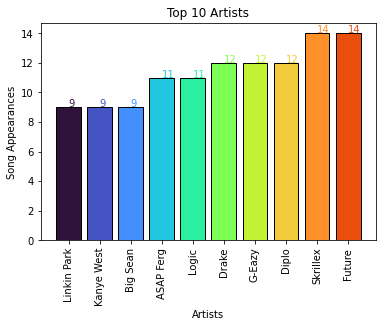

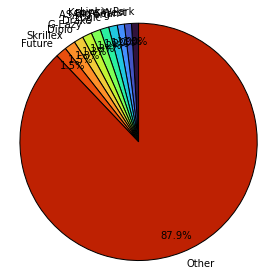

There are 330 unique genres in the playlist.


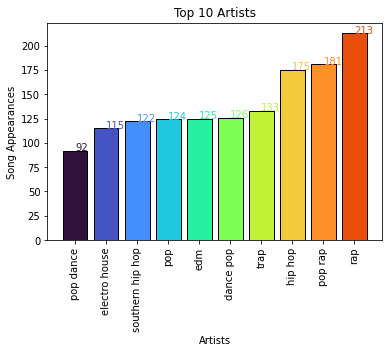

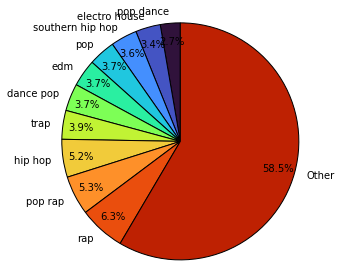

In [56]:
from artistsgenres_dummies import artistsgenres_dummies
df_artistsgenres, num_artists, num_genres = artistsgenres_dummies(df)

In [57]:
df_artistsgenres = df_artistsgenres.drop(df_artistsgenres[df_artistsgenres['date'] == ''].index)

In [58]:
df_trackparams = df_artistsgenres.iloc[:,4:18]
df_trackgenres = df_artistsgenres.iloc[:,-num_genres:]

import re

X = pd.concat([df_trackparams,df_trackgenres], axis = 1)
X = X.drop(['popularity'], 1)
X['date'] = X['date'].apply(lambda x: re.split('-',x)[0])
X['date'] = X['date'].apply(lambda x: int(x))
# X.dtypes
X

,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,classic danish pop,danish hip hop,danish pop,deep tropical house,swedish idol pop,bossbeat,christian trap,ccm,worship,futuristic swag
track0,2002,297787,0.548,0.847,1.0,-3.237,1.0,0.1860,0.062200,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track1,2016,243837,0.841,0.728,7.0,-3.370,1.0,0.0484,0.084700,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track2,2017,177000,0.908,0.621,1.0,-6.638,0.0,0.1020,0.000282,0.000054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track3,2018,312820,0.834,0.730,8.0,-3.714,1.0,0.2220,0.005130,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track4,2017,172800,0.880,0.428,9.0,-8.280,1.0,0.2060,0.149000,0.000051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
track487,2020,126733,0.770,0.572,10.0,-5.349,0.0,0.1130,0.014700,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track488,2020,180348,0.648,0.641,7.0,-5.521,1.0,0.0389,0.005650,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track489,2020,135740,0.866,0.531,9.0,-6.859,1.0,0.0703,0.037900,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track490,2020,137280,0.920,0.472,1.0,-7.505,1.0,0.3200,0.007180,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X.iloc[:,:6] = preprocessing.StandardScaler().fit(X.iloc[:,:6]).transform(X.iloc[:,:6].astype(float))
X.iloc[:,7:13] = preprocessing.StandardScaler().fit(X.iloc[:,7:13]).transform(X.iloc[:,7:13].astype(float))
X


,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,classic danish pop,danish hip hop,danish pop,deep tropical house,swedish idol pop,bossbeat,christian trap,ccm,worship,futuristic swag
track0,-1.946777,1.486600,-0.663526,0.421272,-1.172176,0.886160,1.0,0.216842,-0.064688,-0.290429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track1,0.454142,0.523017,1.088464,-0.378093,0.429542,0.820513,1.0,-0.974126,0.144385,-0.290429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track2,0.625636,-0.670737,1.489089,-1.096849,-1.172176,-0.792545,0.0,-0.510202,-0.640038,-0.290065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track3,0.797131,1.755099,1.046607,-0.364658,0.696495,0.650717,1.0,0.528432,-0.594990,-0.290429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track4,0.625636,-0.745752,1.321664,-2.393296,0.963448,-1.603022,1.0,0.389947,0.741869,-0.290088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
track487,1.140119,-1.568539,0.663920,-1.425999,1.230401,-0.156305,0.0,-0.414994,-0.506064,-0.290429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track488,1.140119,-0.610939,-0.065578,-0.962502,0.429542,-0.241203,1.0,-1.056351,-0.590158,-0.290405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track489,1.140119,-1.407668,1.237951,-1.701410,0.963448,-0.901628,1.0,-0.784575,-0.290487,-0.290429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
track490,1.140119,-1.380163,1.560843,-2.097733,-1.172176,-1.220488,1.0,1.376650,-0.575941,-0.290429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As you know, K-Means clustering, DBSCAN, OPTICS and hierarchical clustering all have one thing in common: They are all Distance-based clustering algorithms. since these algorithms all use Euclidean distance function, they are not good for clustering categorical data. so, in order to cluster non-numerical data using these methods, we have to use other distance functions. One of the most famous distance functions that can be aplied on categorical data, is Gower Distance function, which we are going to use in this notebook to cluster some data on different mushrooms.

A popular choice for the metric to measure this distance is the Euclidean distance. Some researchers also advocate the use of Manhattan distance for particular types of problems. However, both of these distance metrics are applicable only for continuous data. In our data which contains mixed data types, Euclidean and Manhattan distances are not applicable and therefore, algorithms such as K-means and hierarchical clustering would fail to work.

Therefore, we use the Gower distance which is a metric that can be used to calculate the distance between two entities whose attributes are a mix of categorical and quantitative values. This distance is scaled in a numerical range of 0 (identical) and 1 (maximally dissimilar). The details about the mathematics of Gower distance are quite complicated and left out for another article.

In [62]:
df_artistsgenres

,id,song,artists,album,date,time,popularity,danceability,energy,key,...,danish hip hop,danish pop,deep tropical house,swedish idol pop,bossbeat,christian trap,ccm,worship,futuristic swag,cluster
track0,55,'Till I Collapse,"Eminem, Nate Dogg",The Eminem Show,2002-05-26,297787,85,0.548,0.847,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
track1,197,goosebumps,Travis Scott,Birds In The Trap Sing McKnight,2016-09-16,243837,84,0.841,0.728,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
track2,32,HUMBLE.,Kendrick Lamar,DAMN.,2017-04-14,177000,83,0.908,0.621,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
track3,158,SICKO MODE,Travis Scott,ASTROWORLD,2018-08-03,312820,82,0.834,0.730,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
track4,24,Ric Flair Drip (with Metro Boomin),"Offset, Metro Boomin",Without Warning,2017-10-30,172800,81,0.880,0.428,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
track487,421,lil bit,blackbear,lil bit,2020-08-14,126733,0,0.770,0.572,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
track488,422,Who's Laughing Now,Ava Max,Who's Laughing Now,2020-07-30,180348,0,0.648,0.641,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
track489,428,Expensive (feat. Nicki Minaj),"Ty Dolla $ign, Nicki Minaj",Expensive (feat. Nicki Minaj),2020-08-28,135740,0,0.866,0.531,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
track490,442,Not Sorry (feat. Nicki Minaj),"Rich The Kid, Nicki Minaj",BOSS MAN,2020-03-13,137280,0,0.920,0.472,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


DBSCAN

In [112]:
from sklearn.cluster import DBSCAN
import sklearn.utils
import numpy as np
sklearn.utils.check_random_state(1000)

clust = []

for i in range(10,100):
    # Compute DBSCAN
    db = DBSCAN(eps=i/10, min_samples=5).fit(X.iloc[:,:13])
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    df_artistsgenres["dbscan_cluster"]=labels

    realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
    clusterNum = len(set(labels))
    c = len(df_artistsgenres["dbscan_cluster"].unique())
    clust.append(c)

print(clust)
# print(clust.index(max(clust)))
# len(df_artistsgenres["cluster"].unique())

# Compute DBSCAN
db = DBSCAN(eps=(clust.index(max(clust))+10)/10, min_samples=5).fit(X.iloc[:,:13])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_artistsgenres["dbscan_cluster"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

df_artistsgenres[["song","artists","dbscan_cluster"]].head(5)
df_artistsgenres.to_csv('clsuters.csv', encoding='utf-8', index = False)

print(df_artistsgenres['dbscan_cluster'].value_counts())
for i in range(2):
    c0 = df_artistsgenres.loc[df_artistsgenres['cluster'] == i]
    print(c0[["song","artists","cluster"]].head())


[1, 1, 1, 1, 1, 3, 5, 6, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
-1    408
 0     37
 1     16
 4     10
 3      8
 2      7
Name: cluster, dtype: int64
                                   song                        artists  \
track5                        I Like It   Cardi B, Bad Bunny, J Balvin   
track7   Outside (feat. Ellie Goulding)  Calvin Harris, Ellie Goulding   
track11           Wild Ones (feat. Sia)                  Flo Rida, Sia   
track15                       Disturbia                        Rihanna   
track16                          R.I.P.                  Playboi Carti   

         cluster  
track5         0  
track7         0  
track11        0  
track15        0  
track16        0  
                         song           artists  cluster
track12        What I've 

K-Means

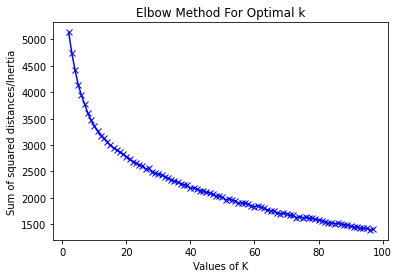

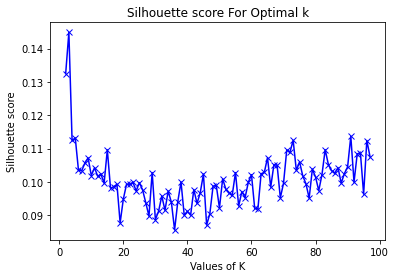

[22 19 34 42 16 13 10 74 79 37 36  1 92 93 68 90 13 14  0 31  1 39  6 16
 34 87 51 14 21 34  1 35 56 54 61 92 87  9 57 26 10  7 69 90 51 10 60 63
 79 59  9  0 94 18 86 21 35 51 29 21 80 86 47 35  9 21  7 24 90 34  9 27
  5 68 58 57 21 67 89 22 45 12  2 43 91 50 47 21 83 57 14 84 19 31 79 15
  1 81  2  9 77 66 13 80 39 31 32 10 34 12 83 92 13 95  7 81 60 84 50 87
 21 47 87 39 68 16  6 79  0 64 60 48  7 18 86 13 58 83 87 34 79 90 20  3
 12 87 34 22 16  9 19 65 17 86  1 38 18  9 78 84  7 13  1  1 55 18  9 68
 86  7  0 12 17 84 17 37 52  3 21  0 13 17 55 60 65  0 14 95 22 32 59 77
 92  1 48 27 80  0 95 56 76 73 47 92 63  0 19 90 37 23 75 42 92 13 87 47
 22 42 27 18 40 92  0 31  0 92 27 44 27  0 35  7 35 29 56 48 45  3 74  7
 90 35 23  9  1 59 32  8 43 59 89 11 54 32 79  1 29 80 77 11 50 54 35 32
  3 33 65 24 11 28 90 95 91 47 35 21 72 52 54  5 33 56 82 31 39 18 27  1
 14 27 84  1 52 39 54 65 38 21 18 10 84 90 39 79 65 67 42 93  1 19  0 77
  3 65 73 39  1  4 50 90 87 25 68 92 59 42 80 68 65

In [153]:
from distutils.util import run_2to3
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# At least 2 clusters
min_clusters = 2
# At most an average of 5 songs per cluster
max_clusters = math.ceil(df_artistsgenres.shape[0]/5)
K = range(min_clusters,max_clusters)
Sum_of_squared_distances = []
silhouette_avg = []
for i in K:
    clusterNum = i
    k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
    k_means.fit(X.iloc[:,:13])
    labels = k_means.labels_

    # Elbow Method
    Sum_of_squared_distances.append(k_means.inertia_)

    # silhouette score
    silhouette_avg.append(silhouette_score(X.iloc[:,:13], labels))
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K")
plt.ylabel("Sum of squared distances/Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

# slope = []
# for i in range(len(K)-1):
#     rise = Sum_of_squared_distances[i+1]-Sum_of_squared_distances[i]
#     slope.append(rise)
# print(slope)

plt.plot(K,silhouette_avg,"bx-")
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette score For Optimal k")
plt.show()
print(labels)

In [154]:
min_clusters + silhouette_avg.index(max(silhouette_avg))

3

In [155]:
i = min_clusters + silhouette_avg.index(max(silhouette_avg))
clusterNum = i
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X.iloc[:,:13])
labels = k_means.labels_
# Elbow Method
Sum_of_squared_distances.append(k_means.inertia_)
# silhouette score
silhouette_avg.append(silhouette_score(X.iloc[:,:13], labels))

print(labels)
l,c = np.unique(labels,return_counts = True)
print(l)
print(c)

[2 1 1 1 1 1 1 2 1 2 0 2 2 1 1 2 1 1 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 0 1 2 1
 2 2 1 1 1 0 2 1 1 2 1 1 1 2 1 2 2 1 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1
 1 2 1 1 2 2 1 2 1 1 2 2 2 1 1 2 1 2 1 2 1 2 2 2 1 2 1 1 1 1 1 2 2 1 1 2 1
 2 1 2 1 2 1 2 2 1 1 2 1 2 1 1 2 1 2 2 2 2 1 1 1 1 2 1 1 1 1 2 0 1 2 1 1 2
 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 1 1 1 2 2 2 1 1 2
 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 0 1 2 2 1 1 2 2 2 1 2 2 2 2 1 2 2 2 2 1 1 2
 2 2 2 2 2 1 2 2 1 1 1 2 1 2 1 1 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 1
 1 1 0 1 2 1 1 2 1 1 2 2 2 2 2 1 1 0 1 0 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 0 2
 0 1 1 1 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 0 2 1 1 2 1 2 2 2 2 1 2 2 2 1 2
 2 2 2 1 2 2 2 2 1 0 2 2 2 2 1 2 0 2 1 1 2 2 2 1 2 2 2 0 2 1 1 2 2 2 2 1 2
 2 1 1 1 2 1 1 1 1 2 1 2 1 1 2 2 0 2 2 0 2 1 1 2 2 0 2 0 1 1 2 1 1 1 1 2 1
 2 2 1 2 2 2 2 2 2 1 1 2 2 1 2 1 2 1 1 2 2 2 0 2 2 1 2 2 1 1 1 1 2 2 2 2 1
 2 2 1 1 0 1 1 1 0 0 1 0 1 1 1 1 2 2 1 2 2 2 1 1 2 1 1 2 2 0 1 1 1 1 2 0 0
 1 1 1 1 2]
[0 1 2]
[ 26 

In [156]:
df_artistsgenres["kmean_cluster"]=labels

In [158]:
df_artistsgenres[["song","artists","kmean_cluster"]].head(5)
df_artistsgenres.to_csv('clsuters.csv', encoding='utf-8', index = False)

for i in range(3):
    c0 = df_artistsgenres.loc[df_artistsgenres['kmean_cluster'] == i]
    print(c0[["song","artists","kmean_cluster"]].head())

                                  song                   artists  \
track10                         Sahara                   Hensonn   
track33                      All Alone             Freddie Dredd   
track42           The Beautiful People            Marilyn Manson   
track142                       Get Low  Dillon Francis, DJ Snake   
track200  Voodoo People - Pendulum Mix     The Prodigy, Pendulum   

          kmean_cluster  
track10               0  
track33               0  
track42               0  
track142              0  
track200              0  
                                      song                       artists  \
track1                          goosebumps                  Travis Scott   
track2                             HUMBLE.                Kendrick Lamar   
track3                          SICKO MODE                  Travis Scott   
track4  Ric Flair Drip (with Metro Boomin)          Offset, Metro Boomin   
track5                           I Like It  Cardi B, Ba

Recommender System